<a href="https://colab.research.google.com/github/venusrohilla/image-regression/blob/master/image%20reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai2 -q

In [0]:
from fastai2.vision.all import *  

In [0]:
from fastai2.basics import *

In [0]:
path=Path('/content/drive/My Drive/face_age')

In [64]:
path.ls()

(#101) [Path('/content/drive/My Drive/face_age/face_age'),Path('/content/drive/My Drive/face_age/095'),Path('/content/drive/My Drive/face_age/093'),Path('/content/drive/My Drive/face_age/110'),Path('/content/drive/My Drive/face_age/092'),Path('/content/drive/My Drive/face_age/099'),Path('/content/drive/My Drive/face_age/091'),Path('/content/drive/My Drive/face_age/096'),Path('/content/drive/My Drive/face_age/101'),Path('/content/drive/My Drive/face_age/100')...]

In [0]:
def to_num(x:str): return int(x)

In [0]:
get_y= Pipeline([parent_label,to_num])

In [0]:
dblock=DataBlock(blocks=[ImageBlock,RegressionBlock()],
get_items=get_image_files,
splitter=RandomSplitter(),
get_y=get_y,
item_tfms=Resize(240, method='squish'),
batch_tfms=[*aug_transforms(size=224, max_warp=0, max_rotate=7.0, max_zoom=1.0)]
)

In [68]:
dblock

Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -> AffineCoordTfm -> LightingTfm


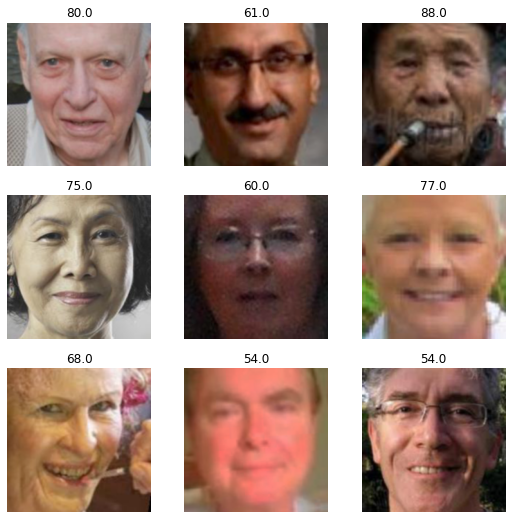

In [69]:
dls=dblock.dataloaders(path,bs=64,verbose=True)
dls.show_batch()

In [0]:
learn=cnn_learner(dls,resnet18,loss_func=MSELossFlat(), y_range=(10.0,70.0))

In [71]:
learn.fit_one_cycle(5,0.0055)
fnames=get_image_files(path/'050')
pred=learn.predict(fnames[11]);pred

epoch,train_loss,valid_loss,time
0,751.840088,760.388123,07:16
1,467.752594,174.294006,07:16
2,313.741638,176.087799,07:16
3,238.000320,147.352081,07:13
4,198.987259,145.301758,07:14


((65.31791687011719), tensor([65.3179]), tensor([65.3179]))

In [0]:
learn.export('vision.pkl')

In [0]:
a=2